<a href="https://colab.research.google.com/github/rrajgithub/f_m_d/blob/main/x2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 5.8MB/s 


In [70]:
import tensorflow as tf
import numpy as np
import os
import cv2
from mtcnn import MTCNN

from keras_preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
#Change the working directory to the location within your computer, where the pre-trained MobileNet V2 is saved 
os.chdir('drive/MyDrive/CS360')
print(os.getcwd())

In [ ]:
%cd face

/content/drive/My Drive/CS360/face


In [71]:
%pwd

'/content/drive/MyDrive/CS360/face'

In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape=(3,)),
    tf.keras.layers.Softmax()])
#model.save('/tmp/model')

model.save("mask_model_pre-trained_1.h5")


In [73]:
#Load the pre-trained model
base_model_1 = tf.keras.models.load_model('mask_model_pre-trained_1.h5')

In [74]:
#We lock the models, such that the imported model is not trainable
base_model_1.trainable = False

In [75]:
Mask_dict = {'No Mask or Incorrectly masked':1, 'Mask':0}
Color_dict = {1:(0,0,255), 0:(0,255,0)}
prediction_threshold = 0.3

In [76]:
from google.colab.patches import cv2_imshow

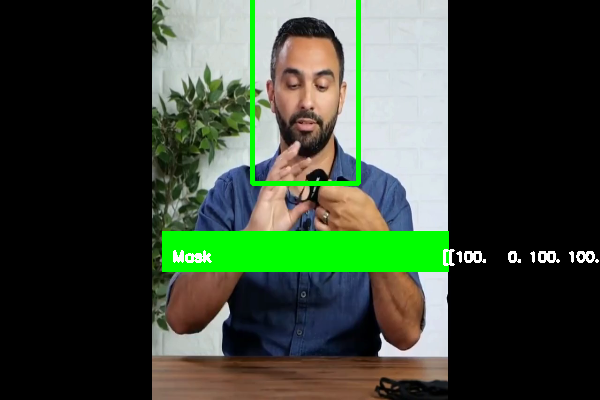

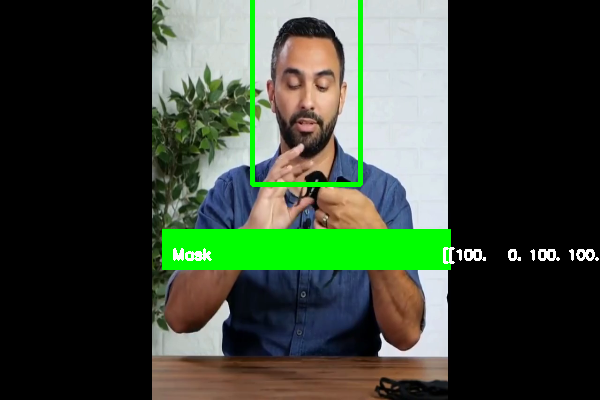

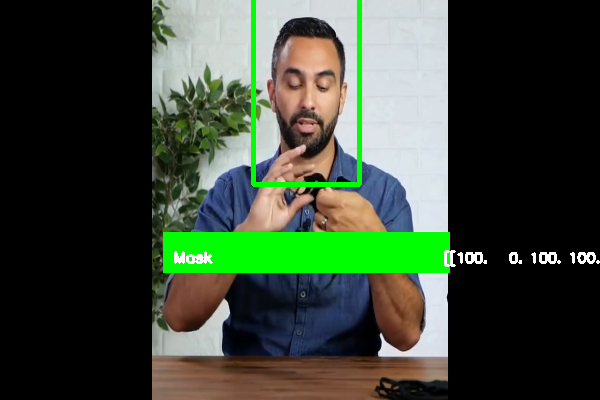

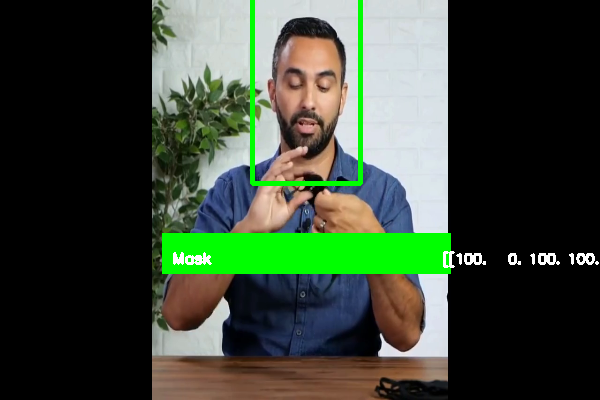

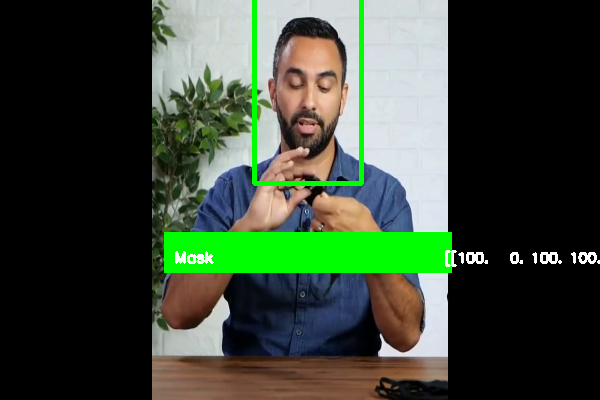

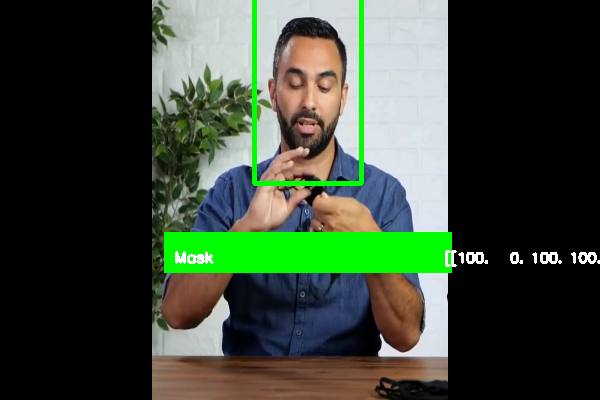

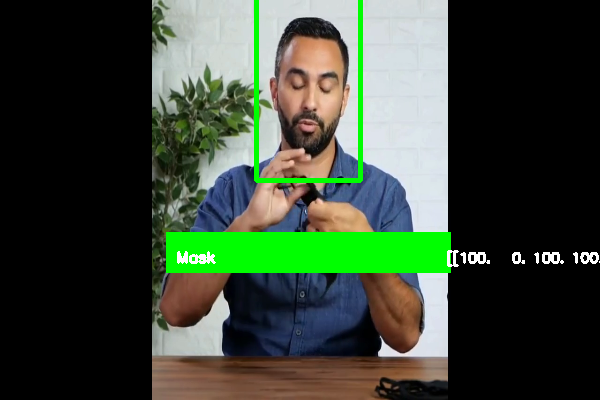

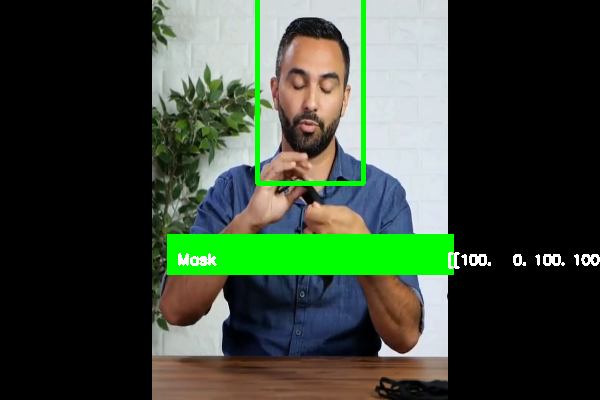

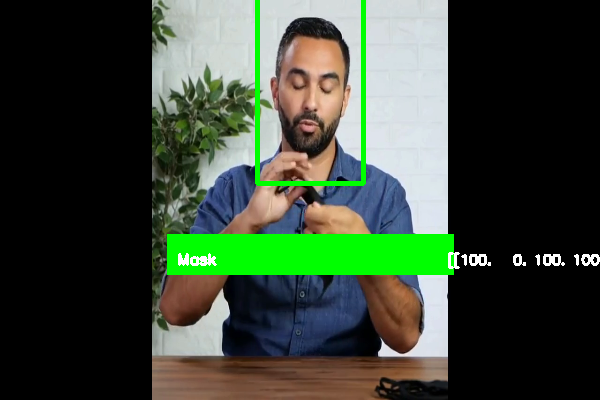

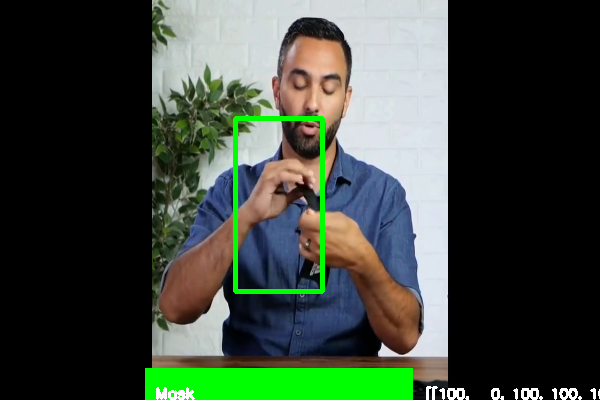

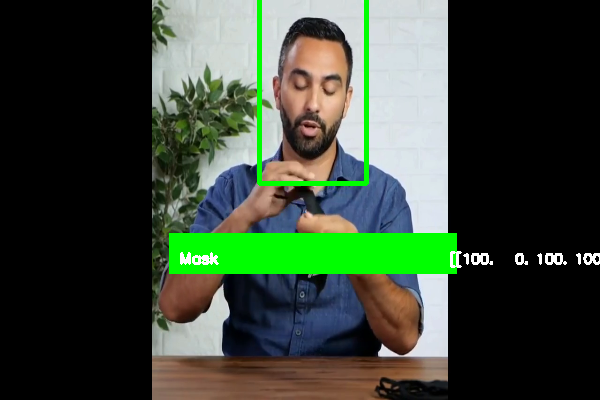

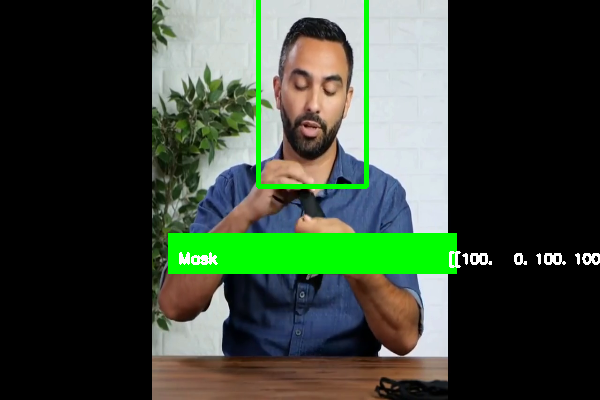

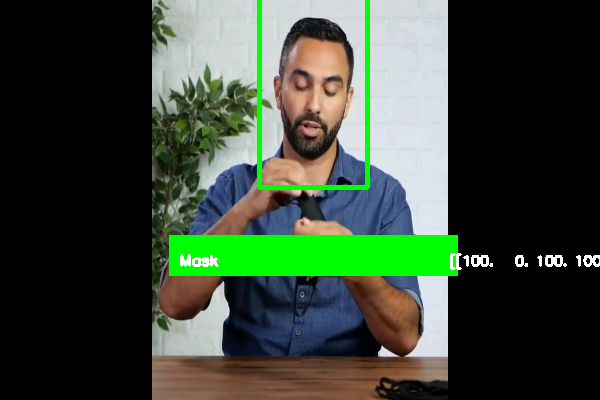

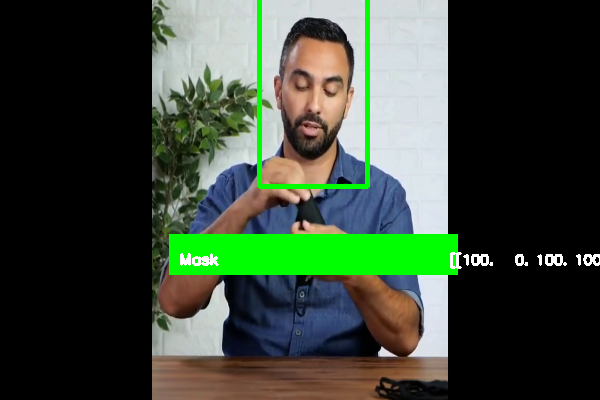

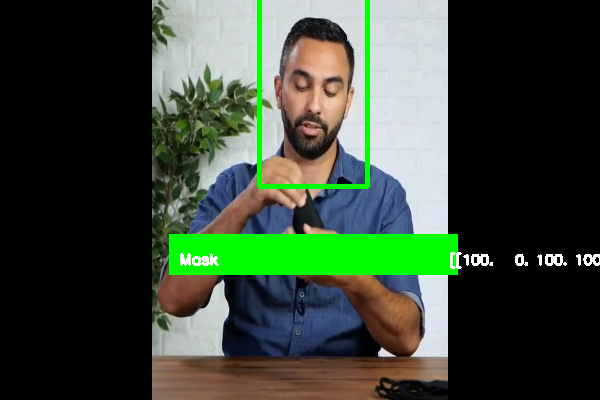

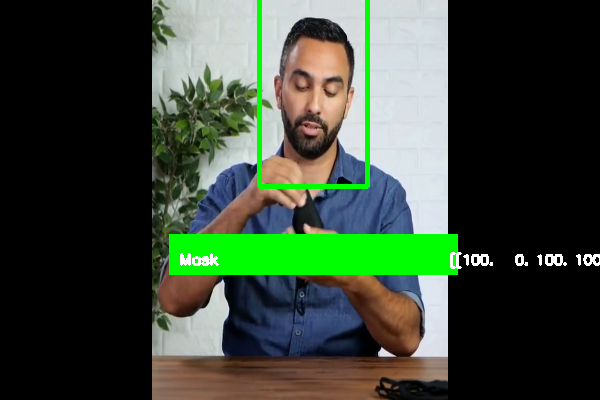

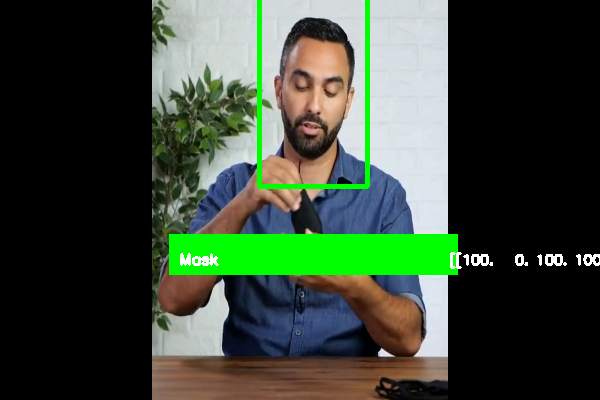

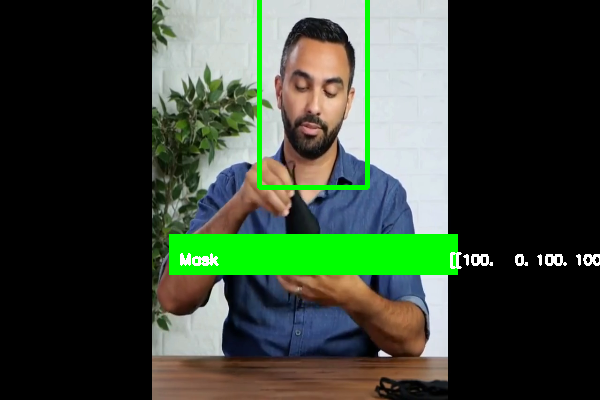

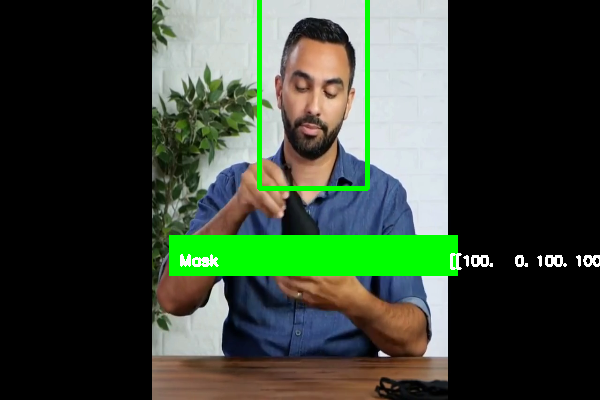

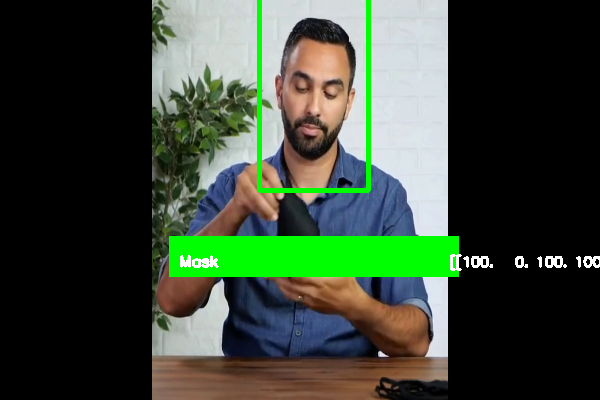

In [ ]:
detector = MTCNN()
video_capture = cv2.VideoCapture('/content/drive/MyDrive/CS360/video.mp4')

while True:
    _,frame = video_capture.read()
   
    frame = cv2.resize(frame, (600, 400))
    
    boxes = detector.detect_faces(frame)
        
    if boxes:
        
        box = boxes[0]['box']
        conf = boxes[0]['confidence']
        x, y, w, h = box[0], box[1], box[2], box[3]
 
        if conf > 0.3:
            roi_color = frame[y-40:y-40+h+80,x-15:x-15+w+30]
            resized = cv2.resize(roi_color,(224,224))
            test_image = image.img_to_array(resized)
            test_image = np.expand_dims(test_image, axis = 0)
            result = base_model_1.predict(test_image)
        
        if result[0][0].all() >= prediction_threshold:
            prediction = 'No Mask or Incorrectly masked'
        else:
            prediction = 'Mask'
        
        frame = cv2.rectangle(frame, (x-20,y-70), (x-20+w+40, y-70+h+110),Color_dict[Mask_dict[prediction]] ,3)
        frame = cv2.rectangle(frame,(x-110,y+180), (x-110+w+220, y+220),Color_dict[Mask_dict[prediction]],-1)
        frame = cv2.putText(frame,prediction, (x-100, y+210),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),2)
        
        if prediction == 'No Mask or Incorrectly masked':
            frame = cv2.putText(frame,str(np.round(result[0][0]*100,2)) + '%', (x+170, y+210),cv2.FONT_HERSHEY_SIMPLEX,0.45,(255,255,255),2)
        else:
            frame =cv2.putText(frame,str(np.round((1-result[0][0])*100,2)) + '%', (x+170, y+210),cv2.FONT_HERSHEY_SIMPLEX,0.45,(255,255,255),2)
        
        cv2_imshow(frame)
         
        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
video_capture.release()
cv2.destroyAllWindows()

In [ ]:
print(frame)

None


In [ ]:
video_capture = cv2.VideoCapture('/content/drive/MyDrive/CS360/video.mp4')

In [ ]:
print(video_capture.read())

(True, array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8))


In [67]:
detector = MTCNN()
video_capture = cv2.imread('/content/drive/MyDrive/CS360/me.jpg')

#while True:
_,frame = video_capture.read()


boxes = detector.detect_faces(frame)
  
if boxes:
  
  box = boxes[0]['box']
  conf = boxes[0]['confidence']
  x, y, w, h = box[0], box[1], box[2], box[3]

  if conf > 0.3:
      roi_color = frame[y-40:y-40+h+80,x-15:x-15+w+30]
      resized = cv2.resize(roi_color,(224,224))
      test_image = image.img_to_array(resized)
      test_image = np.expand_dims(test_image, axis = 0)
      result = base_model_1.predict(test_image)
  
  if result[0][0].all() >= prediction_threshold:
      prediction = 'No Mask or Incorrectly masked'
  else:
      prediction = 'Mask'
  
  frame = cv2.rectangle(frame, (x-20,y-70), (x-20+w+40, y-70+h+110),Color_dict[Mask_dict[prediction]] ,3)
  frame = cv2.rectangle(frame,(x-110,y+180), (x-110+w+220, y+220),Color_dict[Mask_dict[prediction]],-1)
  frame = cv2.putText(frame,prediction, (x-100, y+210),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),2)
  
  if prediction == 'No Mask or Incorrectly masked':
      frame = cv2.putText(frame,str(np.round(result[0][0]*100,2)) + '%', (x+170, y+210),cv2.FONT_HERSHEY_SIMPLEX,0.45,(255,255,255),2)
  else:
      frame =cv2.putText(frame,str(np.round((1-result[0][0])*100,2)) + '%', (x+170, y+210),cv2.FONT_HERSHEY_SIMPLEX,0.45,(255,255,255),2)
  
  cv2_imshow(frame)
    
  

        
video_capture.release()
cv2.destroyAllWindows()

AttributeError: ignored